### Project Objectives

Given data on employees in a company, we will use machine learning to predict which employees are most likely to leave the company.

We aim to use logistic regression, random forest classifier, and a deep learning model to predict whether a company will leave the company.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Human_Resources.csv")
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Exploratory Data Analysis

In [4]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
# We first transform categorical variables
dataset["Attrition"] = dataset["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)
dataset["OverTime"] = dataset["OverTime"].apply(lambda x: 1 if x == "Yes" else 0)
dataset["Over18"] = dataset["Over18"].apply(lambda x: 1 if x == "Y" else 0)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
dataset.isna().sum() # No missing values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

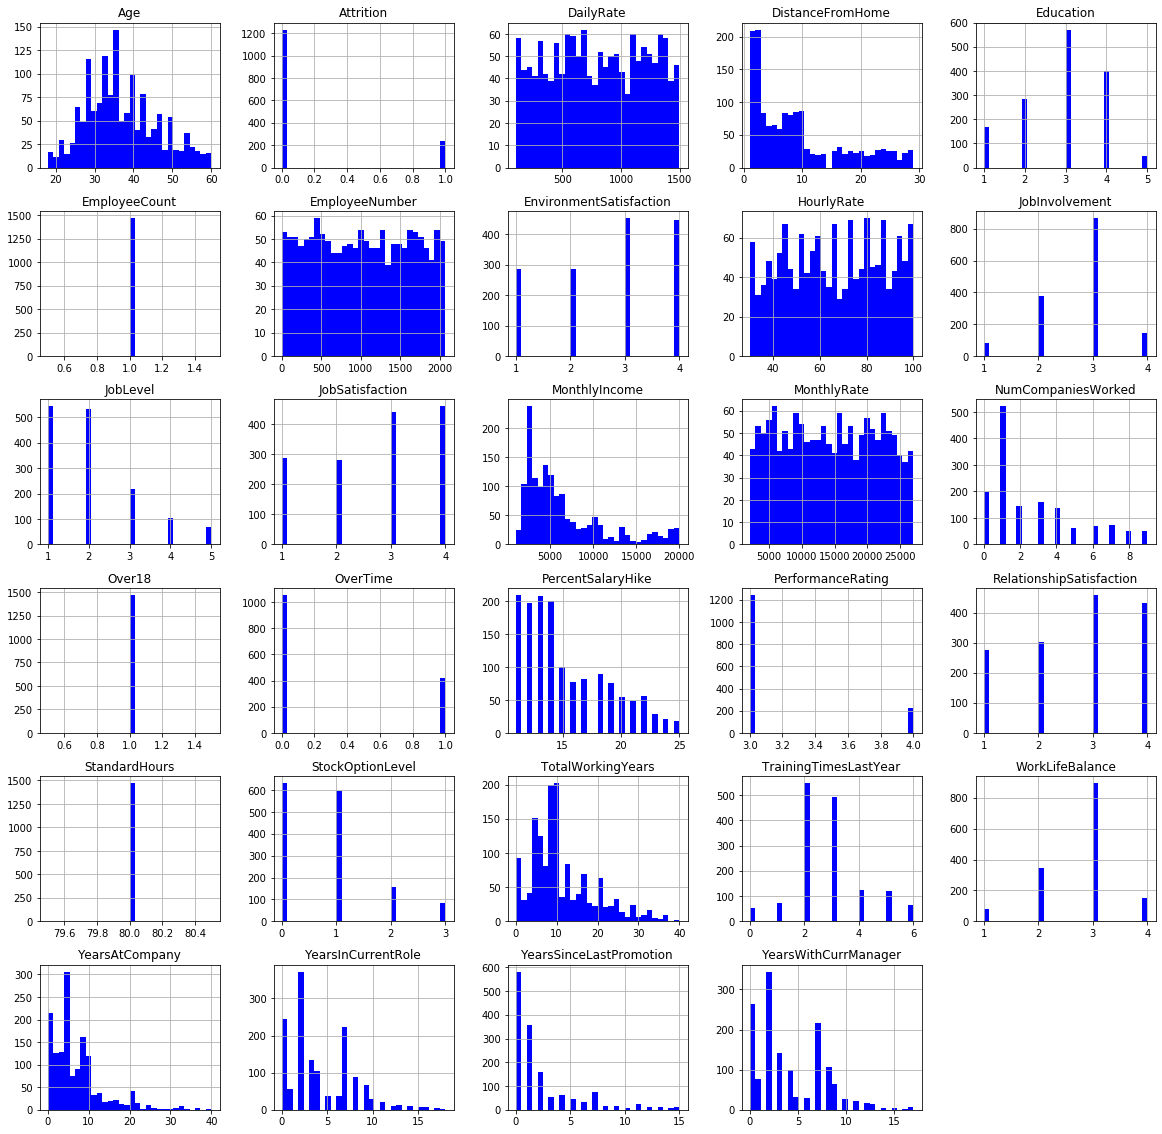

In [7]:
dataset.hist(bins = 30, figsize = (20, 20), color = "blue")
plt.show()
# Notice "MonthlyIncome" and "TotalWorkingYears" for example, have heavy tails
# We drop "EmployeeCount" and "Standardhours" since they are the same for all employees

In [8]:
dataset.drop(["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"], axis = 1, inplace = True)
left = dataset[dataset["Attrition"] == 1]
stayed = dataset[dataset["Attrition"] == 0]

In [9]:
print("Total Number of Employees =", len(dataset))

print("Number of employees who left the company =", len(left))
print("Percentage of employees who left the company =", round(len(left)/len(dataset)*100.0, 3), "%")
 
print("Number of employees who stayed at the company =", len(stayed))
print("Percentage of employees who stayed at the company =", round(len(stayed)/len(dataset)*100.0, 3), "%")

Total Number of Employees = 1470
Number of employees who left the company = 237
Percentage of employees who left the company = 16.122 %
Number of employees who stayed at the company = 1233
Percentage of employees who stayed at the company = 83.878 %


In [10]:
# We have an imbalance in the target variate. 
# More than 4 times as many stayers as leavers

In [11]:
left.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [12]:
stayed.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


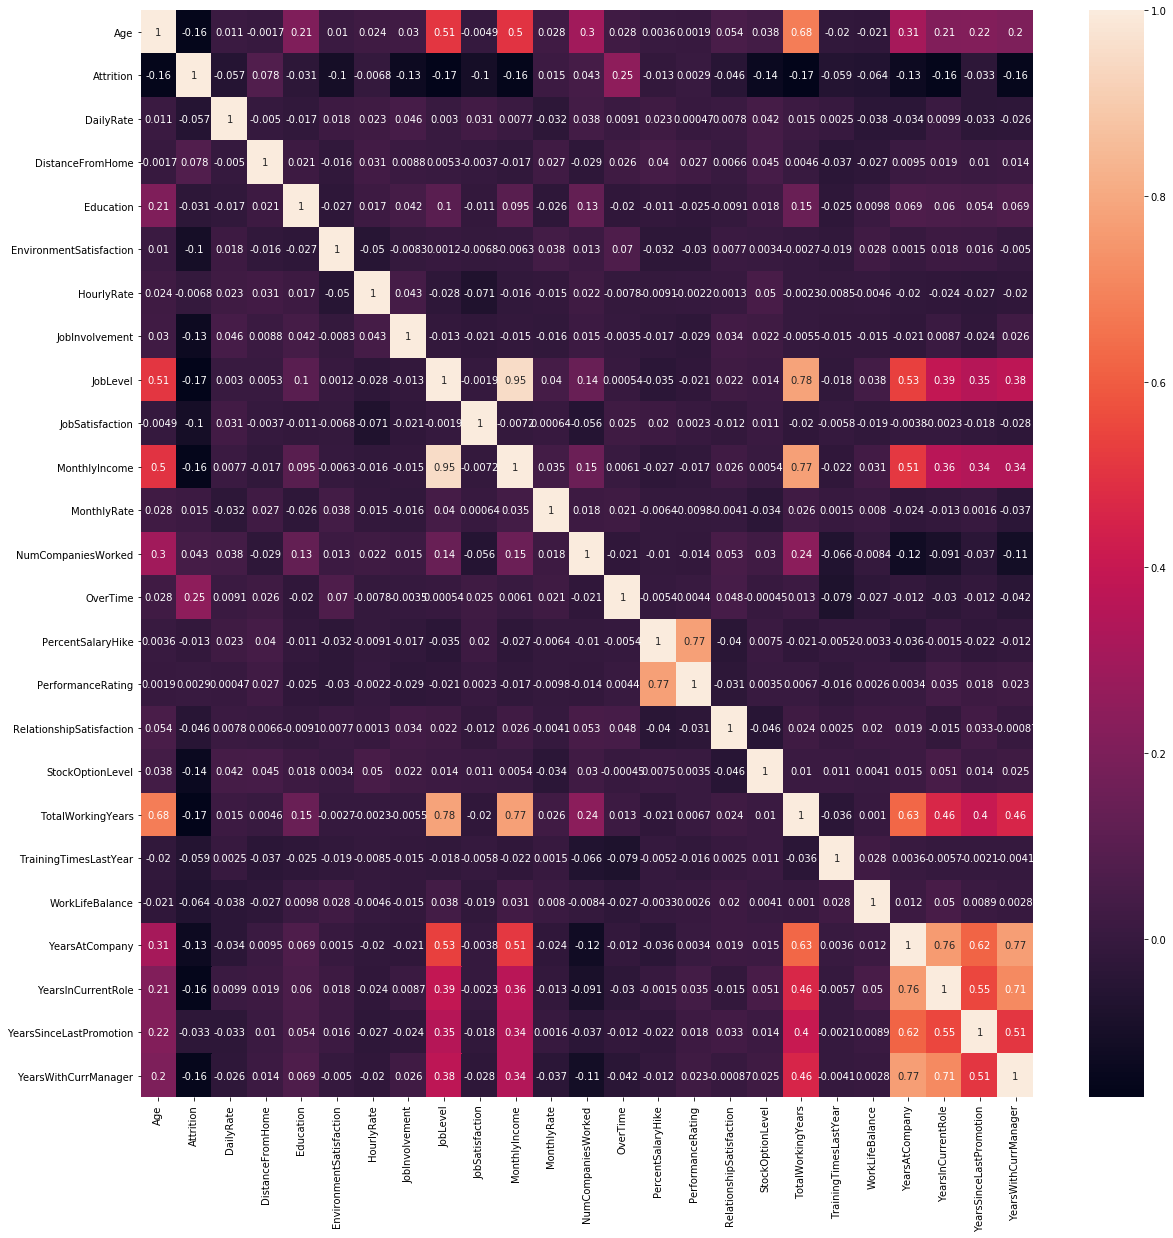

In [13]:
correlations = dataset.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)
plt.show()

# Job level highly correlated with total working hours
# Strong correlation between monthly income, job level and total working hours
# Strong correlation between age and monthly income

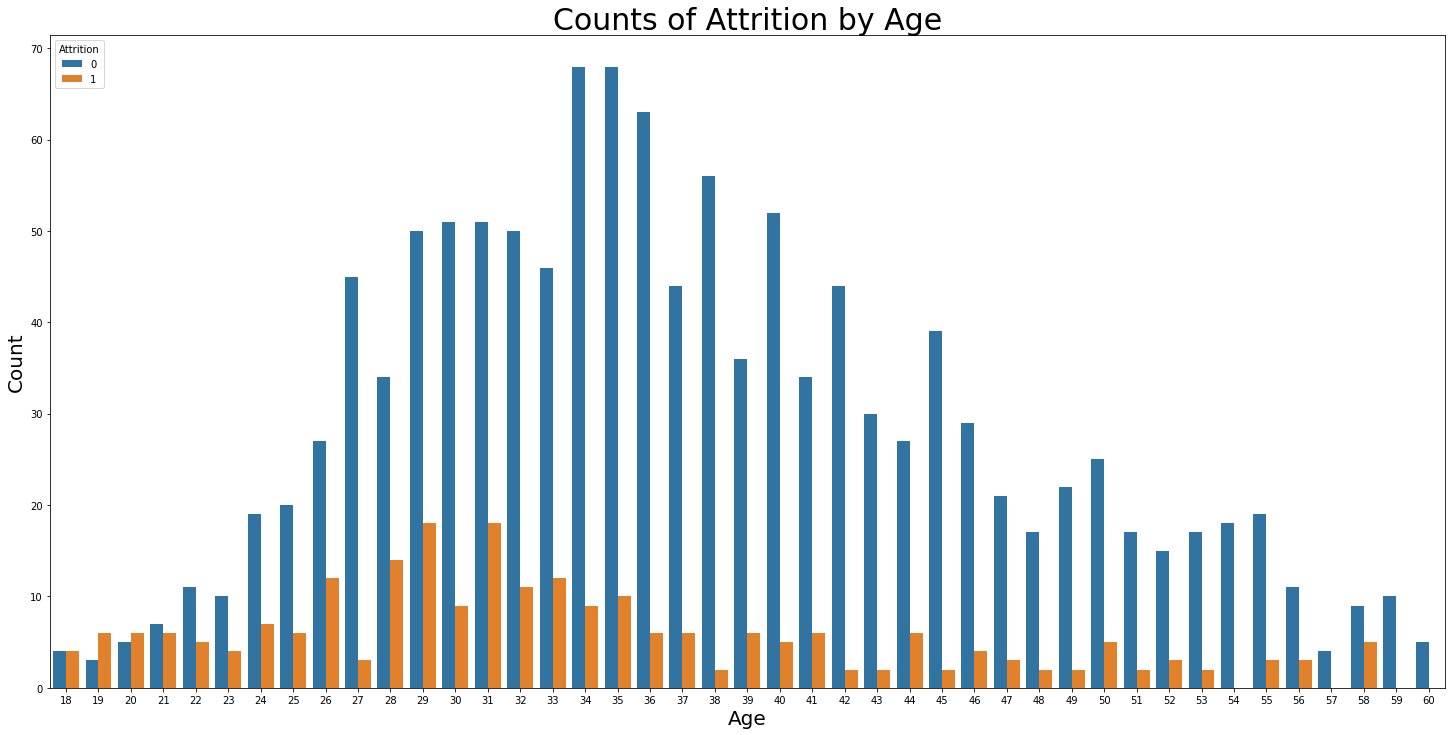

In [14]:
plt.figure(figsize = (25, 12))
sns.countplot(x = "Age", hue = "Attrition", data = dataset)
plt.title("Counts of Attrition by Age", fontsize = 30)
plt.xlabel("Age", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.show()

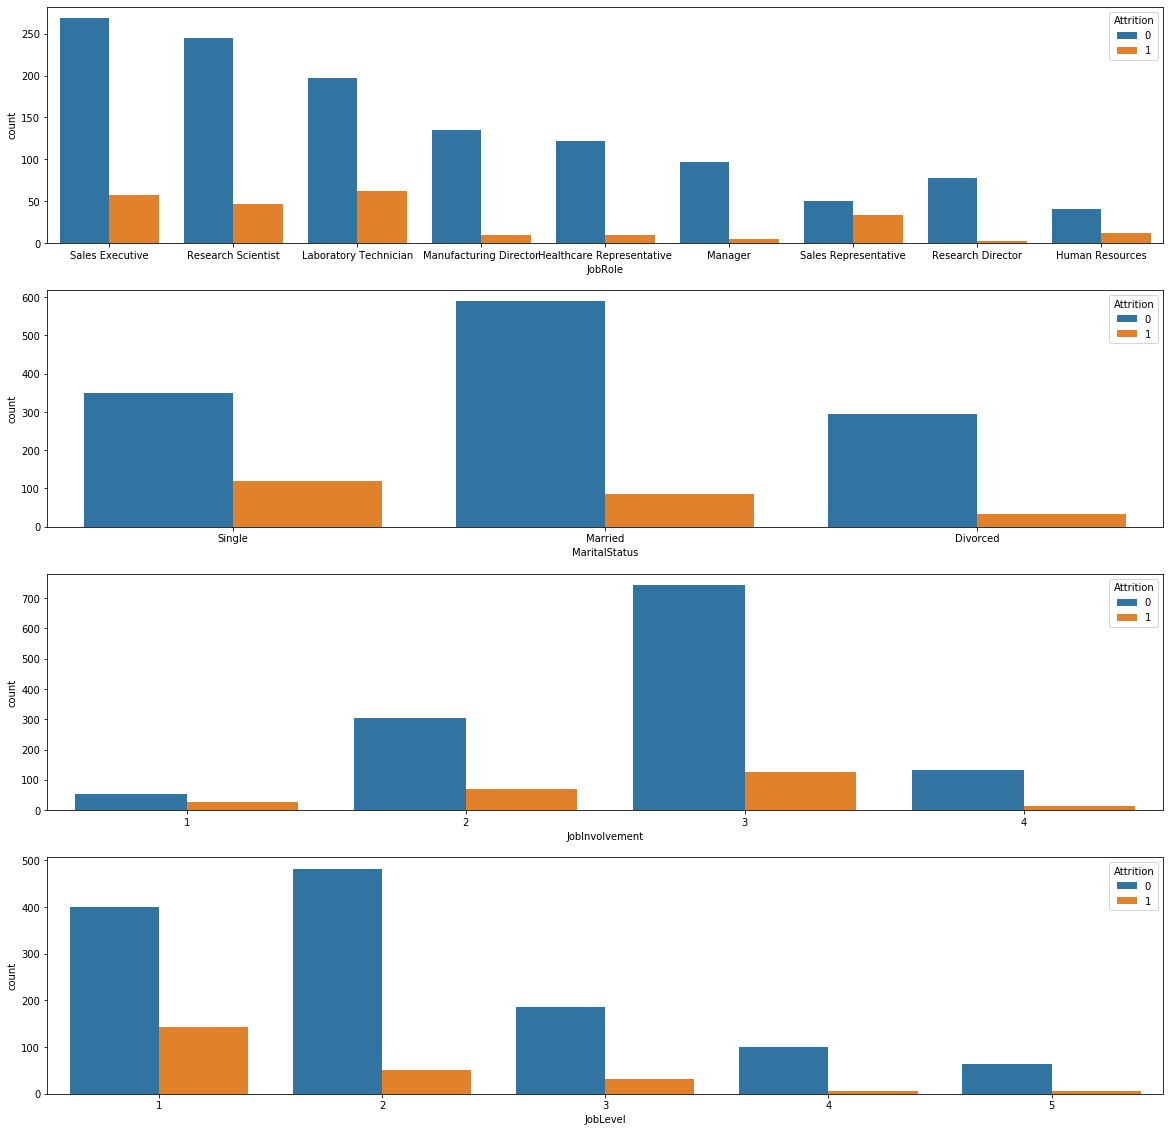

In [15]:
plt.figure(figsize = (20, 20))
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = dataset)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = dataset)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = dataset)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = dataset)
plt.show()

# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job 
# Less involved employees tend to leave the company 
# Less experienced (low job level) tend to leave the company 

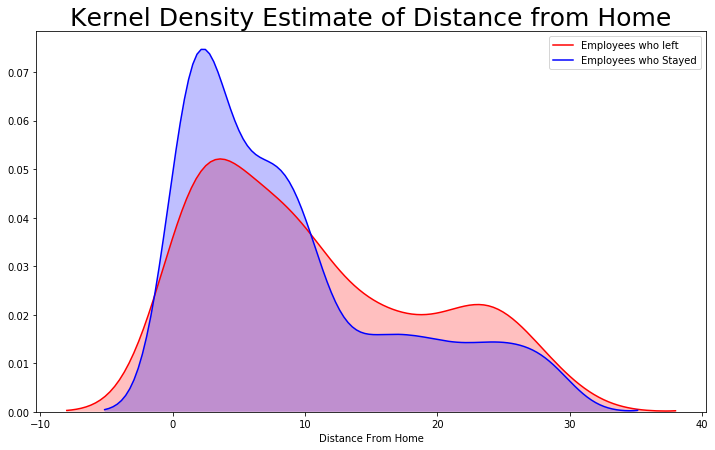

In [16]:
plt.figure(figsize=(12,7))
sns.kdeplot(left['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed['DistanceFromHome'], label = 'Employees who Stayed', shade = True, color = 'b')
plt.xlabel('Distance From Home')
plt.title("Kernel Density Estimate of Distance from Home", fontsize = 25)
plt.show()

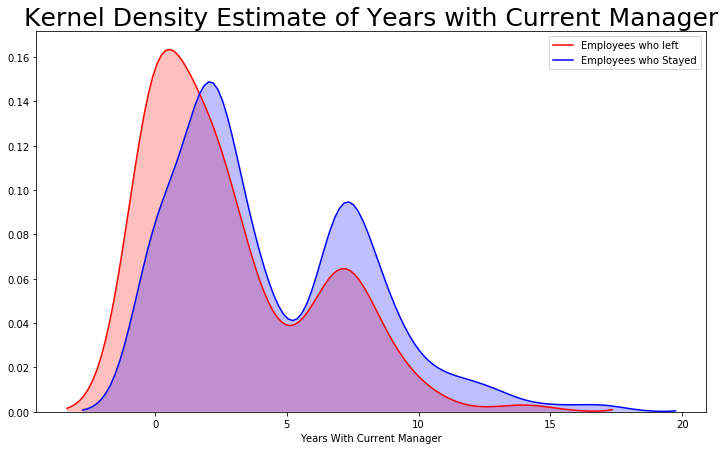

In [17]:
plt.figure(figsize=(12,7))
sns.kdeplot(left['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed['YearsWithCurrManager'], label = 'Employees who Stayed', shade = True, color = 'b')
plt.xlabel('Years With Current Manager')
plt.title("Kernel Density Estimate of Years with Current Manager", fontsize = 25)
plt.show()

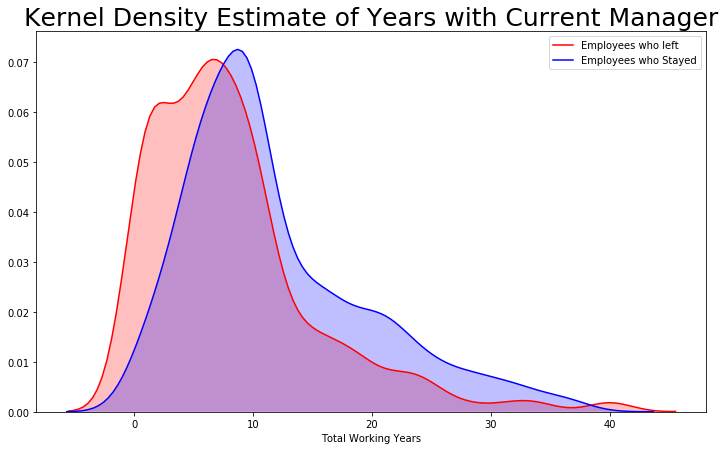

In [18]:
plt.figure(figsize=(12,7))
sns.kdeplot(left['TotalWorkingYears'], shade = True, label = 'Employees who left', color = 'r')
sns.kdeplot(stayed['TotalWorkingYears'], shade = True, label = 'Employees who Stayed', color = 'b')
plt.xlabel('Total Working Years')
plt.title("Kernel Density Estimate of Years with Current Manager", fontsize = 25)
plt.show()

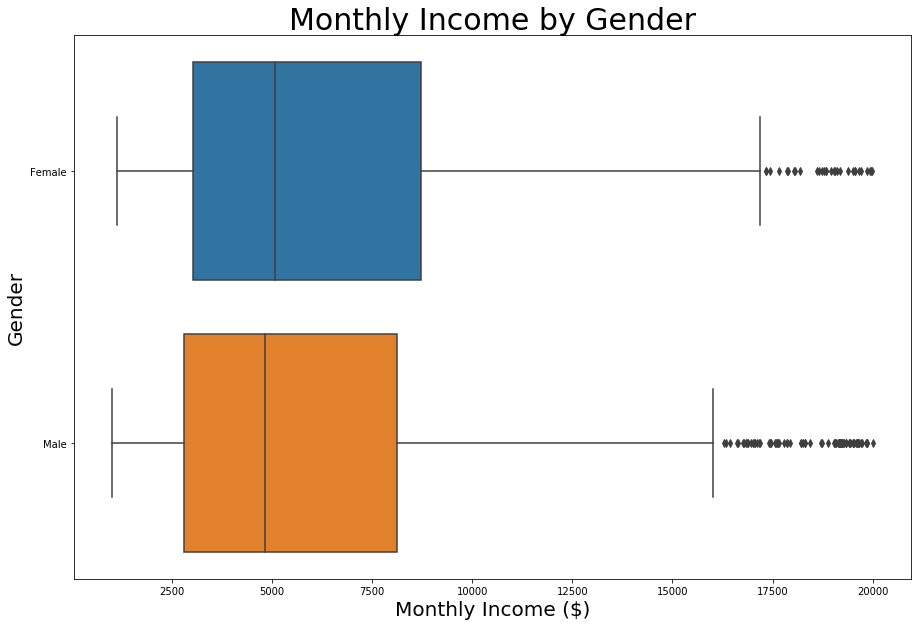

In [19]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = dataset)
plt.ylabel("Gender", fontsize = 20)
plt.xlabel("Monthly Income ($)", fontsize = 20)
plt.title("Monthly Income by Gender", fontsize = 30)
plt.show()

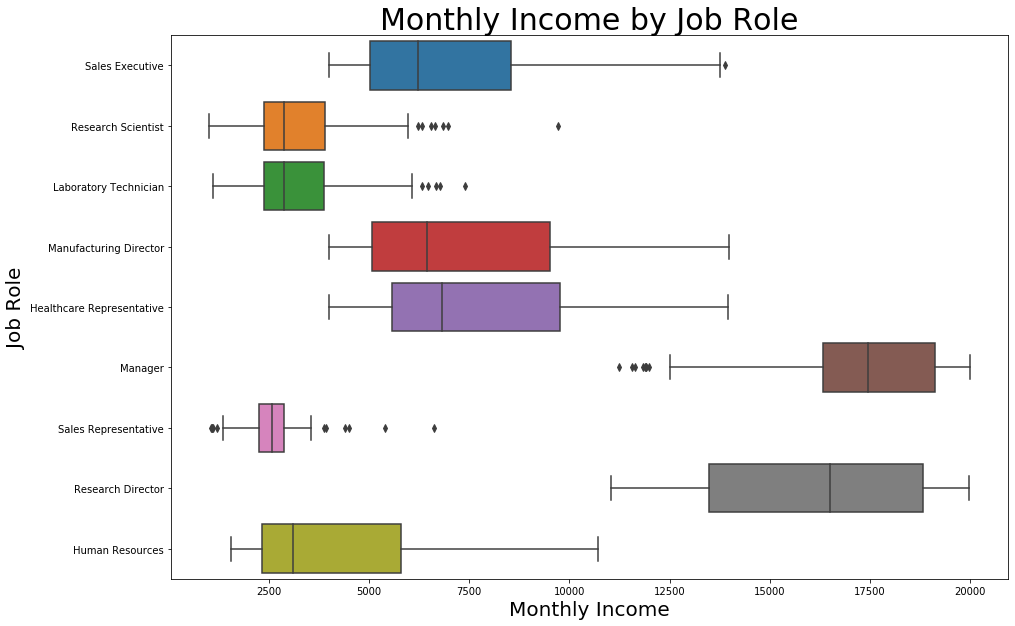

In [20]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = dataset)
plt.ylabel("Job Role", fontsize = 20)
plt.xlabel("Monthly Income", fontsize = 20)
plt.title("Monthly Income by Job Role", fontsize = 30)
plt.show()

### Data Cleaning and Preparation

In [21]:
X_cat = dataset[["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus"]]
X_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [22]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat.shape

(1470, 26)

In [23]:
X_cat = pd.DataFrame(X_cat)
X_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
X_num = dataset[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
X_num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [25]:
X = pd.concat([X_cat, X_num], axis = 1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2


In [26]:
y = dataset["Attrition"]
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

### Logistic Regression

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [28]:
X_train.shape, X_test.shape

((1102, 50), (368, 50))

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

lr = LogisticRegression(penalty = "l2", max_iter = 10000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

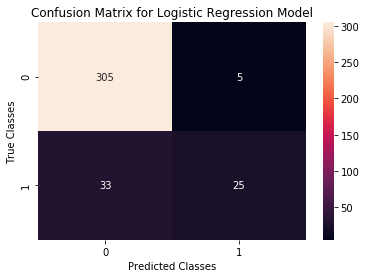

<Figure size 720x720 with 0 Axes>

In [30]:
cm_lr = confusion_matrix(y_test, lr_pred)
axes = plt.axes()
plt.figure(figsize = (10, 10))
sns.heatmap(cm_lr, annot = True, fmt = "g", ax = axes)
axes.set_xlabel("Predicted Classes")
axes.set_ylabel("True Classes")
axes.set_title("Confusion Matrix for Logistic Regression Model")
plt.show()

In [31]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       310
           1       0.83      0.43      0.57        58

    accuracy                           0.90       368
   macro avg       0.87      0.71      0.75       368
weighted avg       0.89      0.90      0.88       368



### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

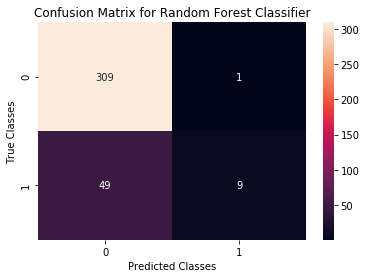

<Figure size 720x720 with 0 Axes>

In [33]:
cm_rf = confusion_matrix(y_test, rf_pred)
axes = plt.axes()
plt.figure(figsize = (10, 10))
sns.heatmap(cm_rf, annot = True, fmt = "g", ax = axes)
axes.set_xlabel("Predicted Classes")
axes.set_ylabel("True Classes")
axes.set_title("Confusion Matrix for Random Forest Classifier")
plt.show()

In [34]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       310
           1       0.90      0.16      0.26        58

    accuracy                           0.86       368
   macro avg       0.88      0.58      0.59       368
weighted avg       0.87      0.86      0.82       368



### Deep Learning Model

In [35]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50, )))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               25500     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [38]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)

Train on 1846 samples
Epoch 1/100
1846/1846 [==============================] - 1s 617us/sample - loss: 181.1618 - accuracy: 0.5260
Epoch 2/100
1846/1846 [==============================] - 0s 222us/sample - loss: 6.1636 - accuracy: 0.5347
Epoch 3/100
1846/1846 [==============================] - 0s 250us/sample - loss: 13.6100 - accuracy: 0.5390
Epoch 4/100
1846/1846 [==============================] - 0s 243us/sample - loss: 3.6394 - accuracy: 0.5276
Epoch 5/100
1846/1846 [==============================] - 0s 237us/sample - loss: 2.5100 - accuracy: 0.5358
Epoch 6/100
1846/1846 [==============================] - 0s 252us/sample - loss: 1.2566 - accuracy: 0.5498
Epoch 7/100
1846/1846 [==============================] - 1s 368us/sample - loss: 0.8759 - accuracy: 0.5672
Epoch 8/100
1846/1846 [==============================] - 1s 400us/sample - loss: 0.8315 - accuracy: 0.5563
Epoch 9/100
1846/1846 [==============================] - 1s 368us/sample - loss: 0.9888 - accuracy: 0.5731
Epoch 10/100

1846/1846 [==============================] - 0s 220us/sample - loss: 0.9829 - accuracy: 0.5211
Epoch 77/100
1846/1846 [==============================] - 0s 215us/sample - loss: 0.9898 - accuracy: 0.4978
Epoch 78/100
1846/1846 [==============================] - 0s 202us/sample - loss: 0.6958 - accuracy: 0.4957
Epoch 79/100
1846/1846 [==============================] - 0s 197us/sample - loss: 0.6955 - accuracy: 0.4919
Epoch 80/100
1846/1846 [==============================] - 0s 207us/sample - loss: 0.6918 - accuracy: 0.5016
Epoch 81/100
1846/1846 [==============================] - 0s 216us/sample - loss: 0.6905 - accuracy: 0.4935
Epoch 82/100
1846/1846 [==============================] - 0s 204us/sample - loss: 0.6930 - accuracy: 0.4995
Epoch 83/100
1846/1846 [==============================] - 0s 213us/sample - loss: 0.6932 - accuracy: 0.4827
Epoch 84/100
1846/1846 [==============================] - 0s 211us/sample - loss: 0.6934 - accuracy: 0.4870
Epoch 85/100
1846/1846 [=================

In [39]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

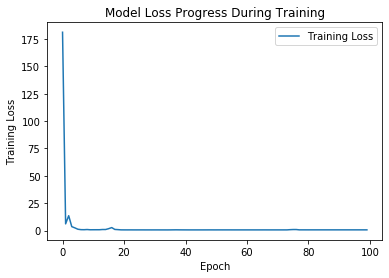

In [40]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])
plt.show()

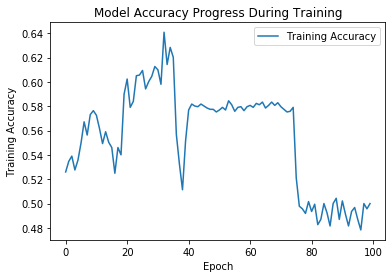

In [41]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])
plt.show()

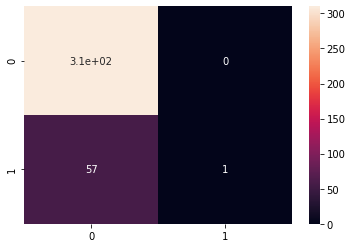

In [42]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       310
           1       1.00      0.02      0.03        58

    accuracy                           0.85       368
   macro avg       0.92      0.51      0.47       368
weighted avg       0.87      0.85      0.78       368

